In [387]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import warnings
warnings.filterwarnings('ignore')


In [388]:
airlines=pd.read_excel('Airlines+Data.xlsx')
airlines


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [389]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [390]:
airlines['Month'] = pd.to_datetime(airlines['Month'], infer_datetime_format=True)

In [391]:
indexedDataset = airlines.set_index(['Month'])

from datetime import datetime
indexedDataset['1995-01']
indexedDataset['1995-01':'2002-12']
indexedDataset['1995']

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


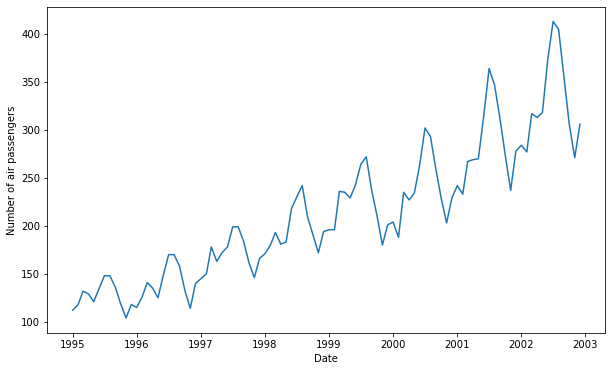

In [392]:
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

In [393]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


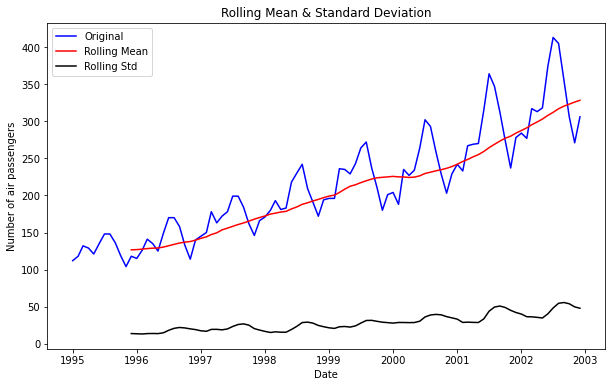

In [394]:
#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')


plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.show(block=False)

In [395]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


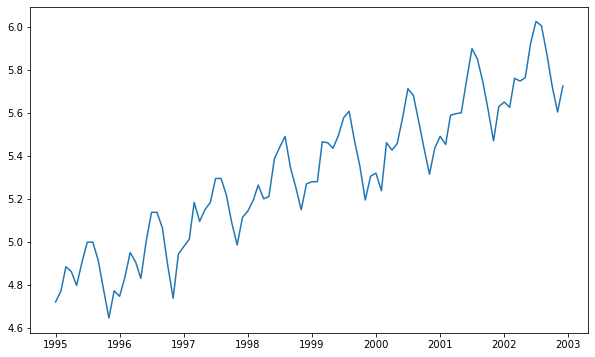

In [396]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

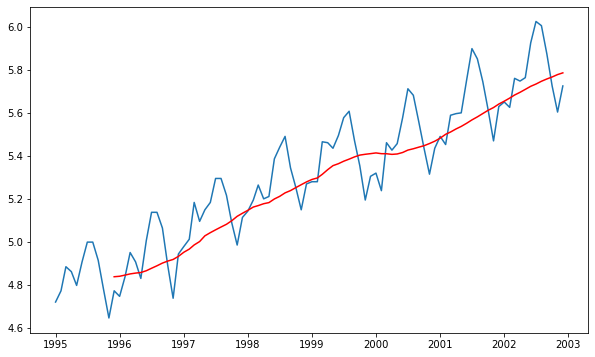

In [397]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [398]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142
1996-05-01,-0.027529
1996-06-01,0.139881
1996-07-01,0.260184
1996-08-01,0.248635


In [399]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

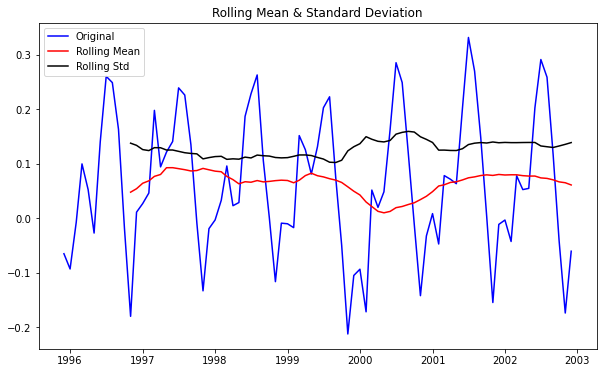

Results of Dickey-Fuller Test:
Test Statistic                 -1.910930
p-value                         0.326937
Lags Used                      12.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [400]:
test_stationarity(datasetLogScaleMinusMovingAverage)

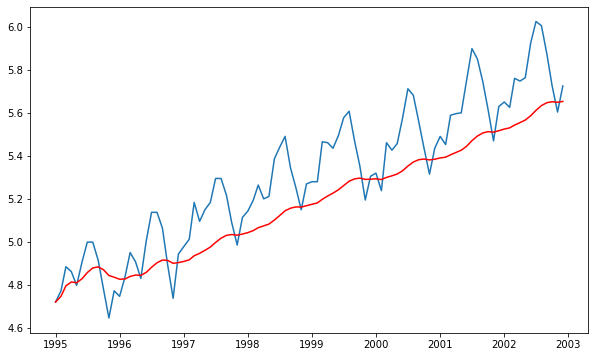

In [401]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

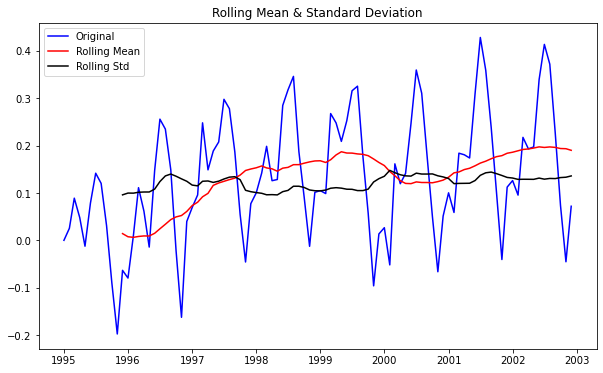

Results of Dickey-Fuller Test:
Test Statistic                 -2.835036
p-value                         0.053441
Lags Used                      12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [402]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

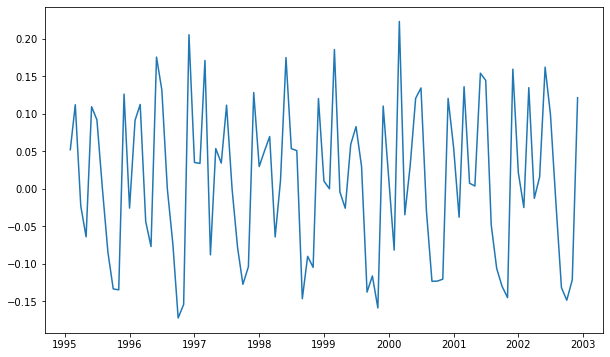

In [403]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

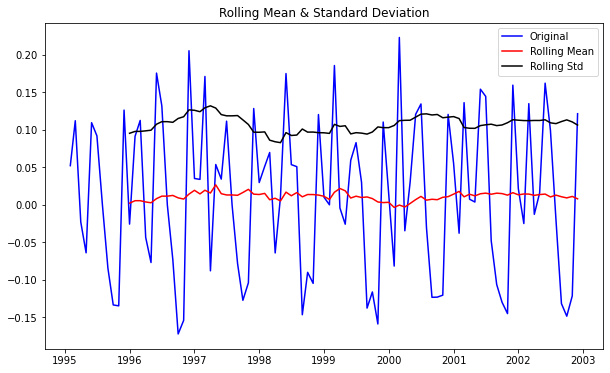

Results of Dickey-Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
Lags Used                      12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [404]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

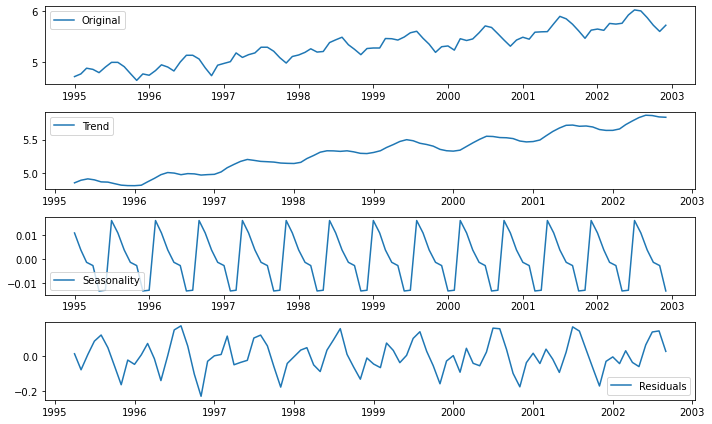

In [405]:
from statsmodels.tsa.seasonal import seasonal_decompose
indexedDataset_logScale.replace([np.inf, -np.inf], np.nan,inplace=True)
indexedDataset_logScale.dropna(inplace=True)


decomposition = seasonal_decompose(indexedDataset_logScale,freq=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [406]:
residual = residual.to_frame() 
residual.columns = ['Passengers']

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

decomposedLogData

,Passengers
Month,
1995-04-01,0.015409
1995-05-01,-0.077902
1995-06-01,0.010993
1995-07-01,0.088851
1995-08-01,0.124784
...,...
2002-05-01,-0.059352
2002-06-01,0.067101
2002-07-01,0.142449


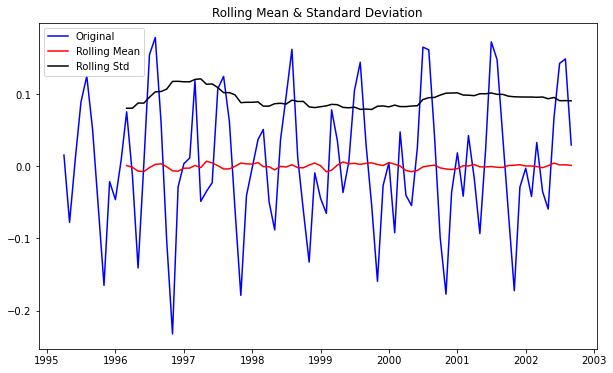

Results of Dickey-Fuller Test:
Test Statistic                 -5.209476
p-value                         0.000008
Lags Used                      12.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [407]:
test_stationarity(decomposedLogData)

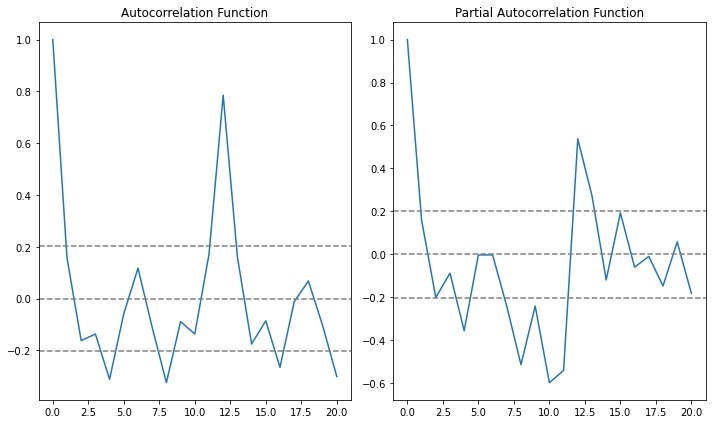

In [408]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Plotting AR model


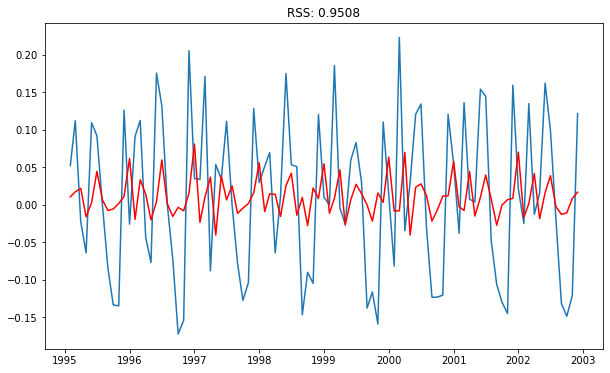

In [409]:
from statsmodels.tsa.arima_model import ARIMA

#Auto Regressive MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting AR model')

Plotting MA model


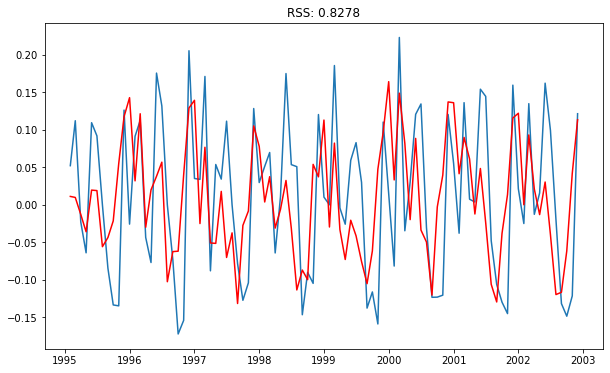

In [410]:
#Moving Average MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting MA model')

Text(0.5, 1.0, 'RSS: 0.6931')

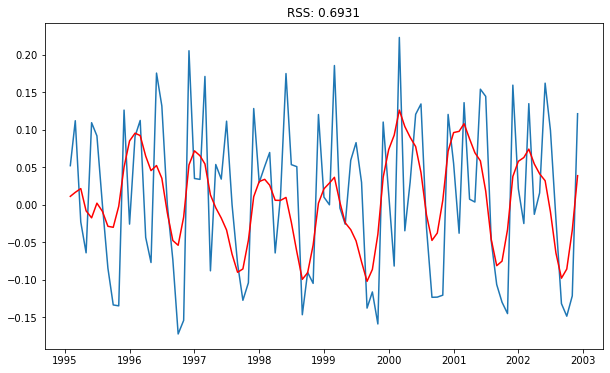

In [411]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))

In [412]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1995-02-01    0.011261
1995-03-01    0.016603
1995-04-01    0.021664
1995-05-01   -0.008096
1995-06-01   -0.017396
dtype: float64


In [413]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1995-02-01    0.011261
1995-03-01    0.027864
1995-04-01    0.049528
1995-05-01    0.041432
1995-06-01    0.024036
dtype: float64


In [414]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'], index=indexedDataset_logScale['Passengers'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1995-01-01    4.718499
1995-02-01    4.781946
1995-03-01    4.910666
1995-04-01    4.909341
1995-05-01    4.837222
dtype: float64

Text(0.5, 1.0, 'RMSE: 221.4944')

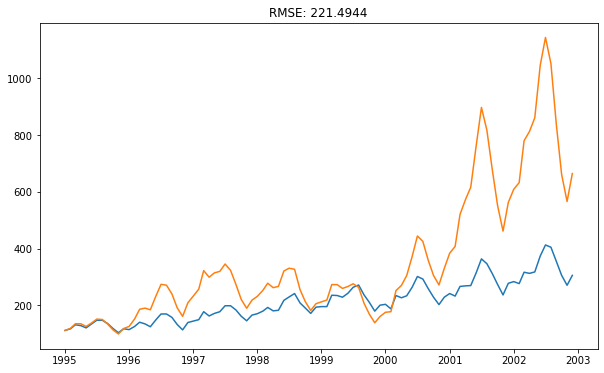

In [415]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset["Passengers"])**2)/len(indexedDataset["Passengers"])))

In [416]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month=pd.DataFrame(month)
months=pd.DataFrame(np.tile(month,(8,1)))
Airlines=pd.concat([airlines,months],axis=1)
Airlines.columns=['Month','Passengers','months']

In [417]:
month_dummies=pd.get_dummies(Airlines['months'])
Airlines=pd.concat([Airlines,month_dummies],axis=1)
Airlines['t']=np.arange(1,97)
Airlines['t_sq']=Airlines['t']*Airlines['t']
Airlines['log_passengers']=np.log(Airlines['Passengers'])


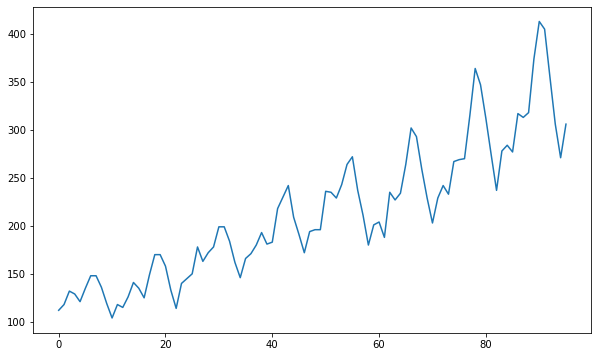

In [418]:
Train=Airlines[0:85]
Test=Airlines[85:]
plt.plot(Airlines.iloc[:,1])
Test.set_index(np.arange(1,12),inplace=True)


### Using Linear

In [419]:
import statsmodels.formula.api as smf
lin_model=smf.ols('Passengers~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Passengers']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin

55.674170015416244

### For Exponential

In [420]:
exp_model=smf.ols('log_passengers~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Passengers']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp

329.69175113922927

### For Quadratic

In [421]:
import statsmodels.formula.api as smf
quad_model=smf.ols('Passengers~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Passengers']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad

50.6595457765005

### Additive Seasonality

In [422]:
import statsmodels.formula.api as smf
add_sea_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
error_add_sea=Test['Passengers']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea

134.34479910432762

### For Additive Seasonality Quadratic

In [423]:
add_sea_quad_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_sq']])
error_add_sea_quad=Test['Passengers']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad

27.412714961208604

### Multiplicative Seasonality

In [424]:
import statsmodels.formula.api as smf
mul_sea_model=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
error_mul_sea=Test['Passengers']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea


330.1926780196679

In [425]:
#Compare the results 

data={'model':pd.Series(['rmse_mul_sea','rmse_add_sea_quad','rmse_add_sea','rmse_quad','rmse_exp','rmse_lin']),'RMSE_Values':pd.Series([rmse_mul_sea,rmse_add_sea_quad,rmse_add_sea,rmse_quad,rmse_exp,rmse_lin])}
rmse_table=pd.DataFrame(data)
rmse_table

,model,RMSE_Values
0,rmse_mul_sea,330.192678
1,rmse_add_sea_quad,27.412715
2,rmse_add_sea,134.344799
3,rmse_quad,50.659546
4,rmse_exp,329.691751
5,rmse_lin,55.674170


In [426]:
#Additive Seasonality Quadratic is having least rmse So that with Additive Seasonality model we will go for forcasting

<AxesSubplot:xlabel='Passengers'>

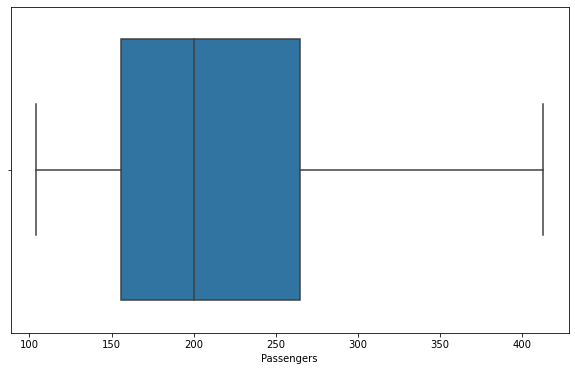

In [427]:
# Boxplot for ever
sns.boxplot("Passengers",data=airlines)

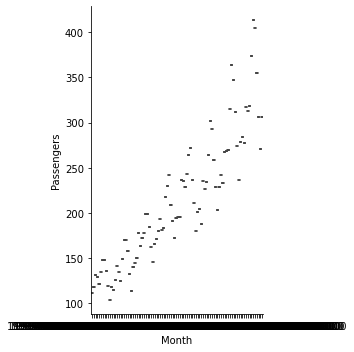

In [428]:
sns.factorplot("Month","Passengers",data=airlines,kind="box")

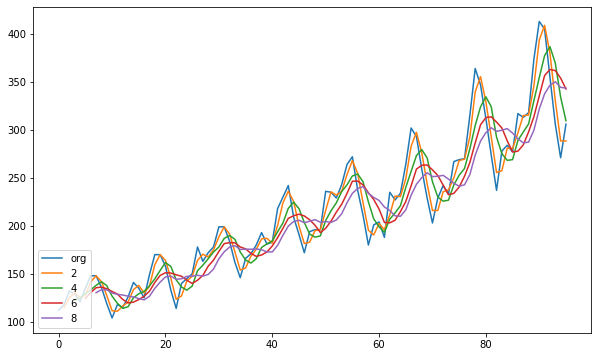

In [429]:
# moving average for the time series to understand better about the trend character in Amtrak
airlines.Passengers.plot(label="org")
for i in range(2,10,2):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

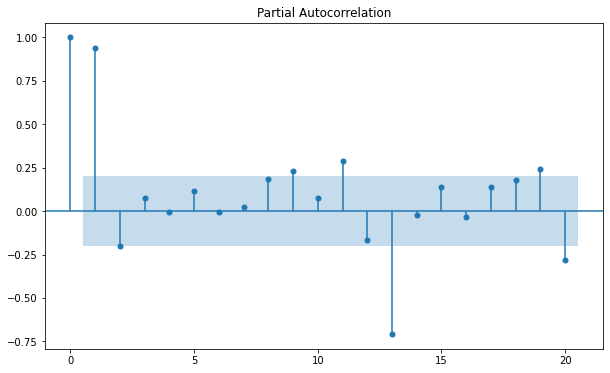

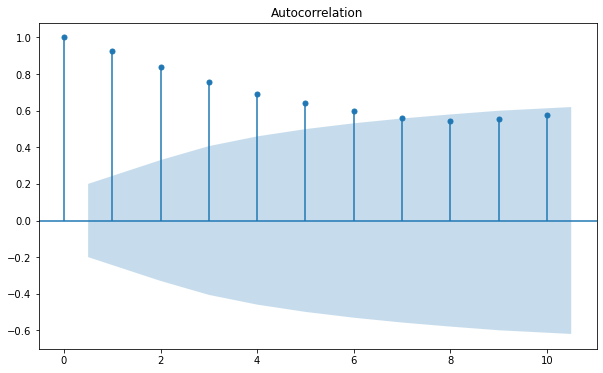

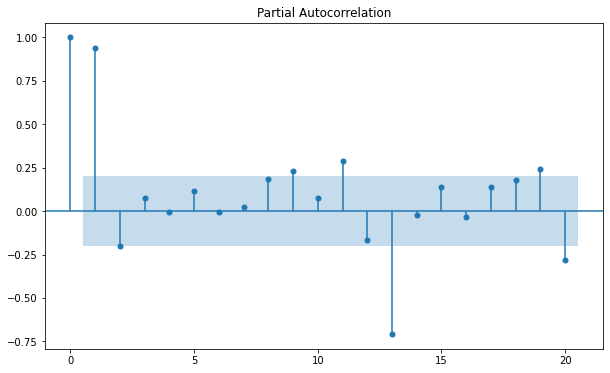

In [430]:
# ACF plots and PACF plots on Original data sets
import statsmodels.graphics.tsaplots as tsa_plots


tsa_plots.plot_acf(airlines.Passengers,lags=10)
tsa_plots.plot_pacf(airlines.Passengers)

In [431]:
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data
Train = airlines.head(90)
Test =airlines.tail(20)

In [432]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [433]:
# Simple Exponential Method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES

ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

11.422314299484949

In [434]:
# Holt method 
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 


hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

12.21540751174982

In [435]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

12.326863259671423

In [436]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers) # 2.35


12.670398578308607

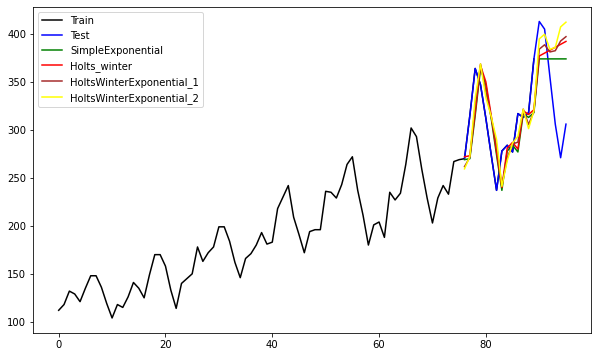

In [437]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')